In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/archi-data.csv')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,generation,triangular or linear,number of linker monomers,ligands per head,afinity
0,0,T,4,6,high
1,0,T,4,6,high
2,0,T,4,6,high
3,0,T,4,6,high
4,0,T,4,3,high
...,...,...,...,...,...
129,2,T,1,3,low
130,2,T,1,3,low
131,2,T,1,3,low
132,2,T,1,3,low


In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
  def __init__(self, ins=4, h1=10, h2=10, outs=3):
    super().__init__()
    self.fc1 = nn.Linear(ins, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, outs)


  def forward(self, X):
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.out(X)

    return X

In [14]:
torch.manual_seed(4)
model_ins = Model()

In [15]:
df['triangular or linear'] = df['triangular or linear'].replace('L', 0)
df['triangular or linear'] = df['triangular or linear'].replace('T', 1)
df['afinity'] = df['afinity'].replace('high', 2)
df['afinity'] = df['afinity'].replace('medium', 1)
df['afinity'] = df['afinity'].replace('low', 0)
df

,generation,triangular or linear,number of linker monomers,ligands per head,afinity
0,0,1,4,6,2
1,0,1,4,6,2
2,0,1,4,6,2
3,0,1,4,6,2
4,0,1,4,3,2
...,...,...,...,...,...
129,2,1,1,3,0
130,2,1,1,3,0
131,2,1,1,3,0
132,2,1,1,3,0


In [16]:
X = df.drop('afinity', axis=1)
y = df['afinity']

In [17]:
X = X.values
y = y.values

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=6)

In [20]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_ins.parameters(), lr=0.001)

In [22]:
epoch = 2000
losses = []
for i in range(epoch):
  y_pred = model_ins.forward(X_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())
  if i % 100 == 0:
    print(f'epoch: {i} and loss: {loss}')
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 and loss: 1.2212226390838623
epoch: 100 and loss: 1.0118439197540283
epoch: 200 and loss: 0.8859982490539551
epoch: 300 and loss: 0.7901170253753662
epoch: 400 and loss: 0.6759532690048218
epoch: 500 and loss: 0.5952730178833008
epoch: 600 and loss: 0.5380387306213379
epoch: 700 and loss: 0.4979861378669739
epoch: 800 and loss: 0.46662911772727966
epoch: 900 and loss: 0.44270890951156616
epoch: 1000 and loss: 0.4258110523223877
epoch: 1100 and loss: 0.41460537910461426
epoch: 1200 and loss: 0.40715399384498596
epoch: 1300 and loss: 0.40197038650512695
epoch: 1400 and loss: 0.39797598123550415
epoch: 1500 and loss: 0.3946848511695862
epoch: 1600 and loss: 0.39185670018196106
epoch: 1700 and loss: 0.3863643407821655
epoch: 1800 and loss: 0.3830762505531311
epoch: 1900 and loss: 0.38059931993484497


Text(0.5, 0, 'epoch')

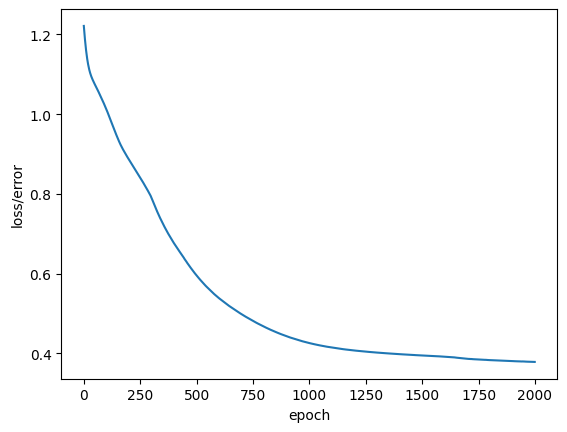

In [23]:
plt.plot(range(epoch), losses)
plt.ylabel("loss/error")
plt.xlabel('epoch')

In [24]:
with torch.no_grad():
  y_eval = model_ins.forward(X_test)
  loss = criterion(y_eval, y_test)
  print(loss)

tensor(0.5270)


In [25]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model_ins.forward(data)

    if y_test[i] == 0:
      X = "low"
    elif y_test[i] == 1:
      X = "medium"
    else:
        X = "high"

    print(f'{i+1}.) {str(y_val)} \t {(y_test)[i]} \t {X} \t {y_val.argmax().item()}')

    if y_val.argmax().item() == y_test[i]:
      correct +=1
print(f'we got {correct} correct')

1.) tensor([ 5.8260, -1.3639, -9.9238]) 	 0 	 low 	 0
2.) tensor([-5.7069,  2.6835,  6.0448]) 	 1 	 medium 	 2
3.) tensor([ 2.3147, -1.2292, -5.0734]) 	 0 	 low 	 0
4.) tensor([-0.2807,  3.2936, -6.9107]) 	 1 	 medium 	 1
5.) tensor([ 0.0967, -0.8479,  4.1792]) 	 2 	 high 	 2
6.) tensor([ 0.4581,  0.8814, -5.1382]) 	 1 	 medium 	 1
7.) tensor([-5.7069,  2.6835,  6.0448]) 	 2 	 high 	 2
8.) tensor([  5.0880,   0.0936, -10.9442]) 	 0 	 low 	 0
9.) tensor([  5.0880,   0.0936, -10.9442]) 	 0 	 low 	 0
10.) tensor([ 2.2849, -3.6914,  5.7713]) 	 2 	 high 	 2
11.) tensor([ 2.3147, -1.2292, -5.0734]) 	 0 	 low 	 0
12.) tensor([ 2.7052, -2.6461,  3.5271]) 	 0 	 low 	 2
13.) tensor([-0.0604,  1.6814, -3.7997]) 	 1 	 medium 	 1
14.) tensor([ 5.8260, -1.3639, -9.9238]) 	 0 	 low 	 0
15.) tensor([-3.8879,  4.2224, -1.0317]) 	 2 	 high 	 1
16.) tensor([ 0.1530, -3.9386, 12.8218]) 	 2 	 high 	 2
17.) tensor([  5.0880,   0.0936, -10.9442]) 	 0 	 low 	 0
18.) tensor([  5.0880,   0.0936, -10.9442]) 	 0 

In [41]:
new_drug = torch.tensor([1.0, 1.0, 3.0, 3.0])
new_drug_2 = torch.tensor([2.0, 0.0, 4.0, 6.0])

In [39]:
import numpy as np
with torch.no_grad():
    result = model_ins(new_drug)

max_index = np.argmax(result.numpy())

labels = ["low", "medium", "high"]
label = labels[max_index]

print(f'\taffinity is {max_index}\twhich is {label}')

	affinity is 1	which is medium


In [40]:
with torch.no_grad():
  result = model_ins(new_drug_2)

max_index = np.argmax(result.numpy())

labels = ["low", "medium", "high"]
label = labels[max_index]

print(f'\taffinity is {max_index}\twhich is {label}')

	affinity is 2	which is high
